# Car Price Prediction

### LIBRARIES

In [48]:
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
import xgboost as xg
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

In [3]:
warnings.filterwarnings('ignore')

In [4]:
# LOAD DATASET
df = pd.read_csv('car data.csv')


In [5]:
df.shape

(301, 9)

In [6]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## DATA CLEANING

In [7]:
df.columns = df.columns.str.lower()

In [8]:
df.isnull().sum()

car_name         0
year             0
selling_price    0
present_price    0
driven_kms       0
fuel_type        0
selling_type     0
transmission     0
owner            0
dtype: int64

In [25]:
df.describe().style.format(precision=2).background_gradient(cmap='RdBu')

,year,selling_price,present_price,driven_kms,owner
count,299.00,299.00,299.00,299.00,299.00
mean,2013.62,4.59,7.54,36916.75,0.04
std,2.90,4.98,8.57,39015.17,0.25
min,2003.00,0.10,0.32,500.00,0.00
25%,2012.00,0.85,1.20,15000.00,0.00
50%,2014.00,3.51,6.10,32000.00,0.00
75%,2016.00,6.00,9.84,48883.50,0.00
max,2018.00,35.00,92.60,500000.00,3.00


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   car_name       301 non-null    object 
 1   year           301 non-null    int64  
 2   selling_price  301 non-null    float64
 3   present_price  301 non-null    float64
 4   driven_kms     301 non-null    int64  
 5   fuel_type      301 non-null    object 
 6   selling_type   301 non-null    object 
 7   transmission   301 non-null    object 
 8   owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [12]:
df['car_name'].value_counts()

car_name
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: count, Length: 98, dtype: int64

In [15]:
# drop col -> 'Car_Name'
df.drop('car_name', axis=1, inplace=True)

In [16]:
df.duplicated().sum()

2

In [17]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

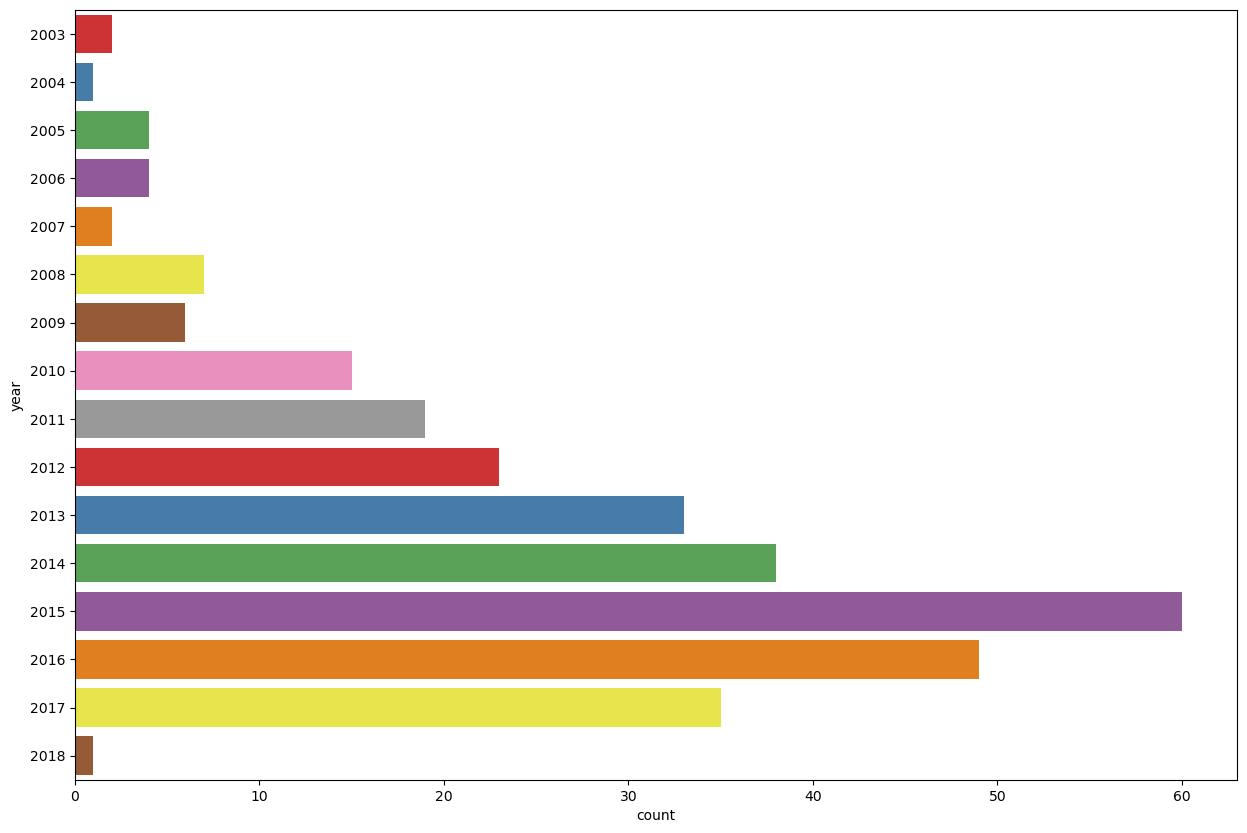

In [22]:
plt.figure(figsize=(15,10))
sns.countplot(y="year",data=df ,palette="Set1")
plt.show()

In [23]:
object_columns = df.select_dtypes(include=['object']).columns
df[object_columns]

,fuel_type,selling_type,transmission
0,Petrol,Dealer,Manual
1,Diesel,Dealer,Manual
2,Petrol,Dealer,Manual
3,Petrol,Dealer,Manual
4,Diesel,Dealer,Manual
...,...,...,...
296,Diesel,Dealer,Manual
297,Petrol,Dealer,Manual
298,Petrol,Dealer,Manual
299,Diesel,Dealer,Manual


In [24]:
for column in object_columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print()

Unique values in 'fuel_type':
['Petrol' 'Diesel' 'CNG']

Unique values in 'selling_type':
['Dealer' 'Individual']

Unique values in 'transmission':
['Manual' 'Automatic']



In [27]:
# features and labels
X= df.drop('selling_price', axis=1)
Y= df['selling_price']

In [28]:
# train test split
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.2)

In [53]:
#hot encoding
encoder=LabelEncoder()

encoder.fit(df['fuel_type'])
df['fuel_type']=encoder.fit_transform(df['fuel_type'])
dictft=dict(enumerate(encoder.classes_))
print(dictft)

encoder.fit(df['selling_type'])
df['selling_type']=encoder.fit_transform(df['selling_type'])
dictst=dict(enumerate(encoder.classes_))
print(dictst)

encoder.fit(df['transmission'])
df['transmission']=encoder.fit_transform(df['transmission'])
dicttr=dict(enumerate(encoder.classes_))
print(dicttr)


df.head()

{0: 0, 1: 1, 2: 2}
{0: 0, 1: 1}
{0: 0, 1: 1}


,year,selling_price,present_price,driven_kms,fuel_type,selling_type,transmission,owner
0,2014,3.35,5.59,27000,2,0,1,0
1,2013,4.75,9.54,43000,1,0,1,0
2,2017,7.25,9.85,6900,2,0,1,0
3,2011,2.85,4.15,5200,2,0,1,0
4,2014,4.60,6.87,42450,1,0,1,0


In [54]:
# features and labels
X= df.drop('selling_price', axis=1)
Y= df['selling_price']

In [55]:
X.head()

,year,present_price,driven_kms,fuel_type,selling_type,transmission,owner
0,2014,5.59,27000,2,0,1,0
1,2013,9.54,43000,1,0,1,0
2,2017,9.85,6900,2,0,1,0
3,2011,4.15,5200,2,0,1,0
4,2014,6.87,42450,1,0,1,0


In [43]:
# pipeline
from sklearn.pipeline import Pipeline
pipe= Pipeline([
    ('model', model)
])

In [60]:
# train test split
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.2)
from xgboost import XGBRegressor

xgb_model = XGBRegressor(random_state=42)  

In [67]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train,y_train)
pred2=rf_regressor.predict(X_test)

In [68]:
mae = mean_absolute_error(y_test,pred2)
print("Mean Absolute Error (MAE):", mae)
print("==============================================================================")
mse = mean_squared_error(y_test,pred2)
print("Mean Squared Error (MSE):", mse)
print("==============================================================================")
r2 = r2_score(y_test,pred2)
print("R-squared (R2) Score:", r2)
print("==============================================================================")
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test,pred2)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Error (MAE): 0.7253783333333332
Mean Squared Error (MSE): 2.446838537166666
R-squared (R2) Score: 0.905919464171571
Mean Absolute Percentage Error (MAPE): 25.311050121443245


In [70]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state=42,max_depth=5)
dt_regressor.fit(X_train, y_train)
pred3 = dt_regressor.predict(X_test)

In [71]:
mae = mean_absolute_error(y_test,pred3)
print("Mean Absolute Error (MAE):", mae)
print("==============================================================================")
mse = mean_squared_error(y_test,pred3)
print("Mean Squared Error (MSE):", mse)
print("==============================================================================")
r2 = r2_score(y_test,pred3)
print("R-squared (R2) Score:", r2)
print("==============================================================================")
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test,pred3)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Error (MAE): 1.0034394716467463
Mean Squared Error (MSE): 4.513883935494639
R-squared (R2) Score: 0.826441911524566
Mean Absolute Percentage Error (MAPE): 36.97866458517105


In [72]:
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
gb_regressor.fit(X_train,y_train)
pred1=gb_regressor.predict(X_test)

In [73]:
mae = mean_absolute_error(y_test,pred1)
print("Mean Absolute Error (MAE):", mae)
print("==============================================================================")
mse = mean_squared_error(y_test,pred1)
print("Mean Squared Error (MSE):", mse)
print("==============================================================================")
r2 = r2_score(y_test,pred1)
print("R-squared (R2) Score:", r2)
print("==============================================================================")
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test,pred1)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Error (MAE): 0.7105268221924154
Mean Squared Error (MSE): 2.5265079944664905
R-squared (R2) Score: 0.9028561867553967
Mean Absolute Percentage Error (MAPE): 24.997189861003914
